In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import time
import os
from dateutil.parser import parse
from pandas.core.dtypes.common import (is_numeric_dtype, is_datetime64_dtype, is_bool_dtype)
from scipy import stats
from scipy.stats import normaltest
import pandas_profiling

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
def import_data(filename):
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    name,ext = os.path.splitext(filename)
    if ext == '.csv':
        data = pd.read_csv(filename,low_memory=False,parse_dates= True,infer_datetime_format = True,date_parser = dateparse)
    if ext == '.json':
        data = pd.read_json(filename)
    if ext =='.xlsx' or ext == '.xls':
        data == pd.read_excel(filename)
    return data

In [52]:
#data = import_data('/home/divyanka/xflow/Lithium/dailyreportsdatafromlithium/lithium_correct_consolidated_data.csv')

In [4]:
data = import_data('/home/divyanka/Downloads/train_s3TEQDk.csv')

# Count Plots

In [5]:
def count_plot(data):
    for col in data.columns:
        plt.figure(figsize=(12,10))
        sns.countplot(data[col],order=data[col].value_counts().iloc[:10].index)
        plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')
        plt.show()

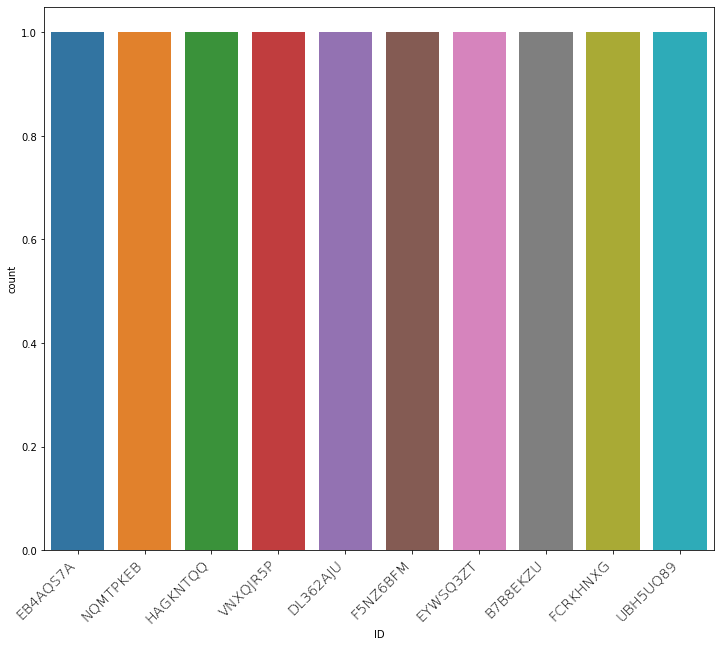

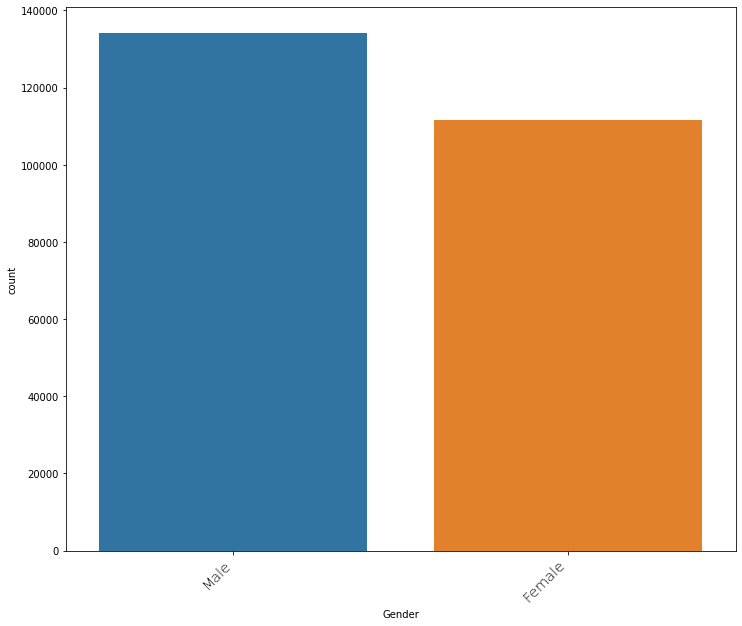

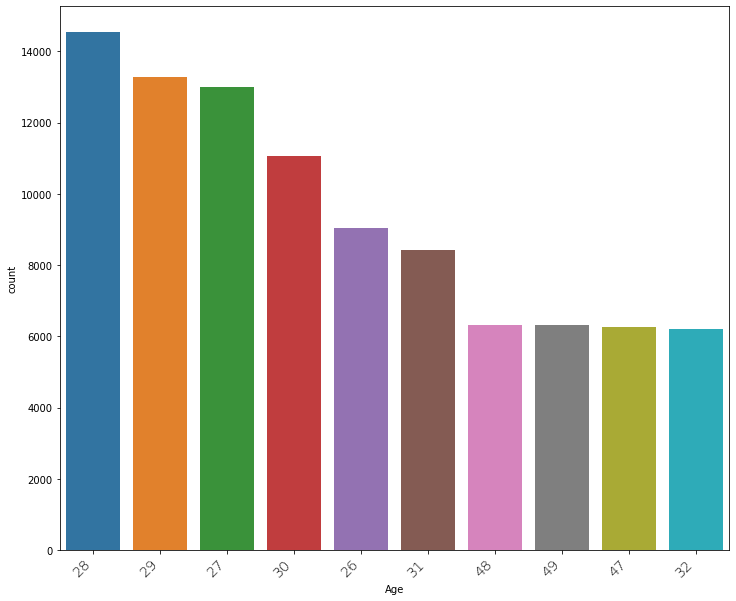

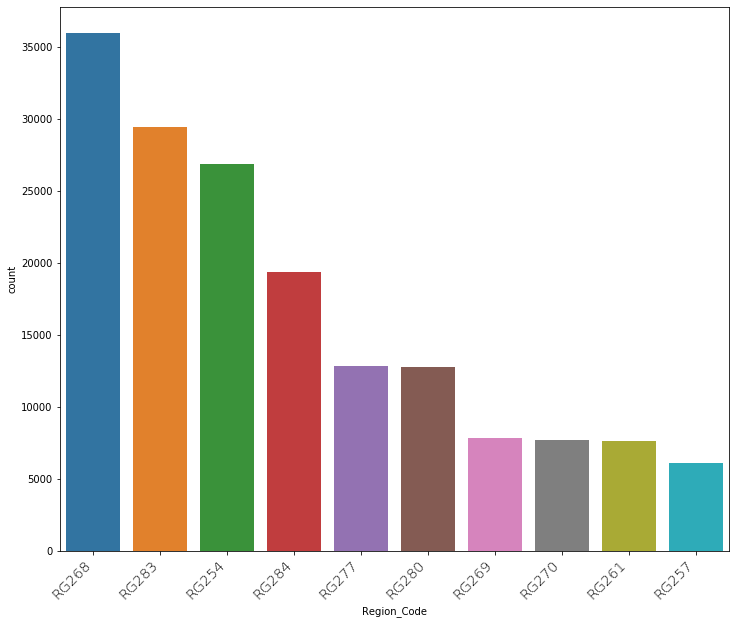

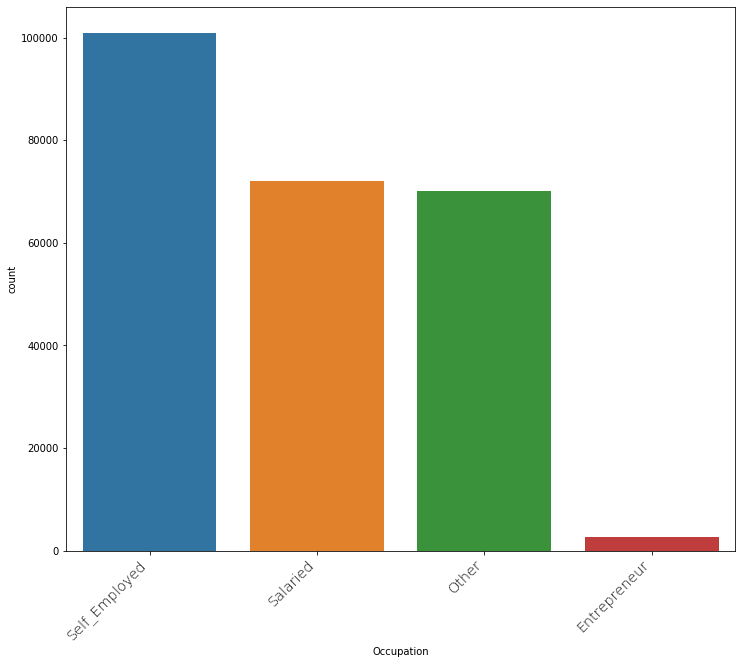

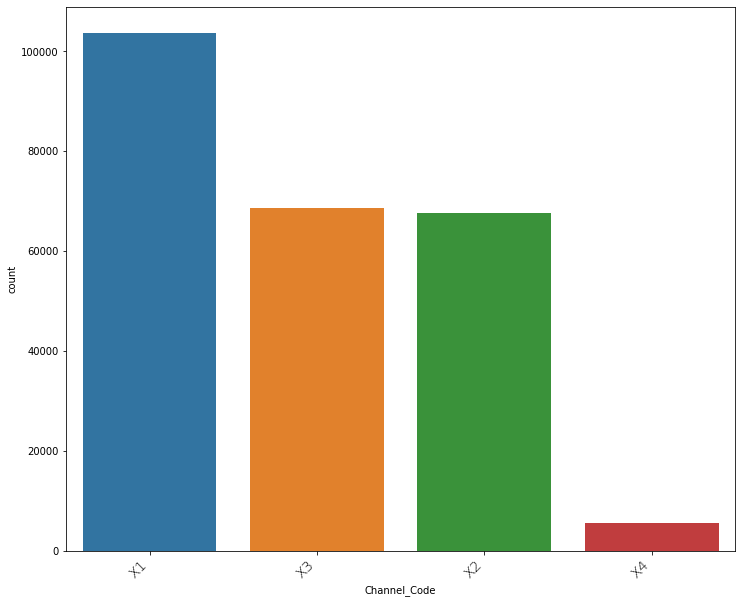

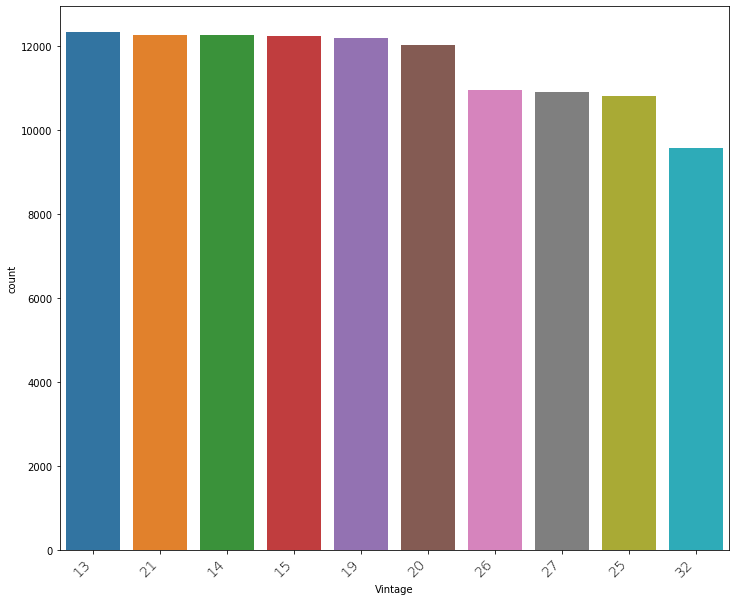

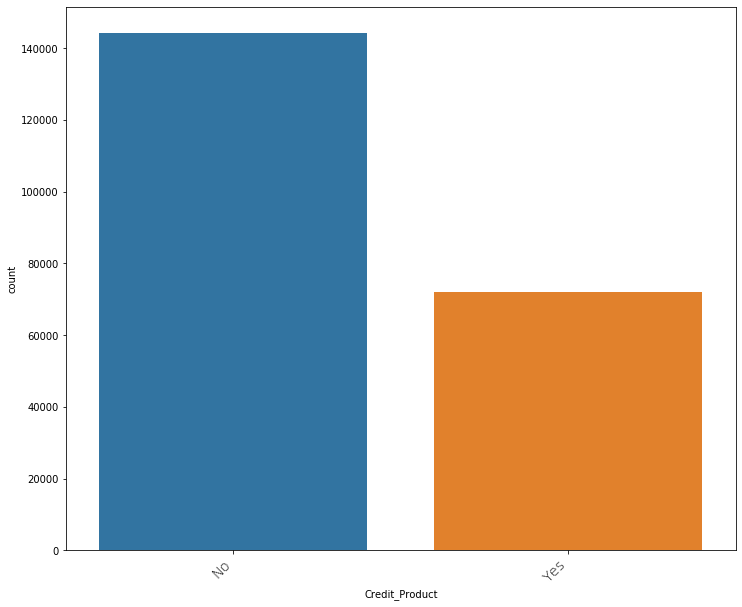

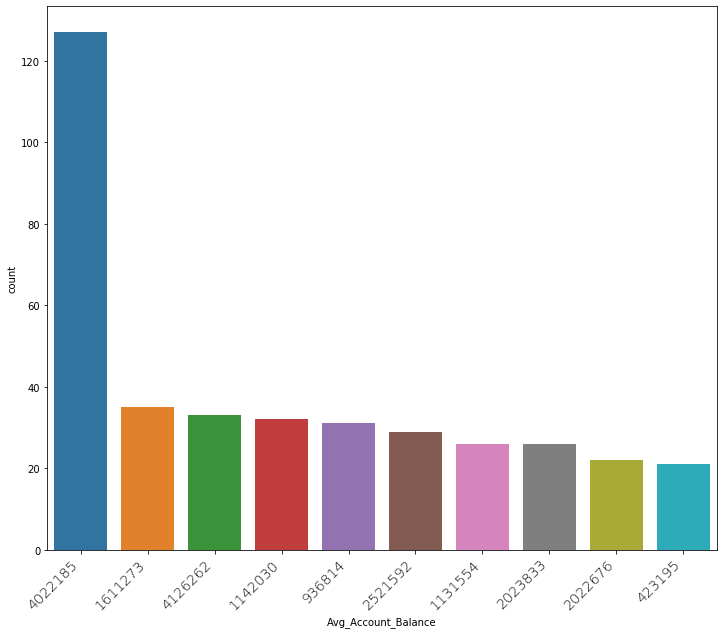

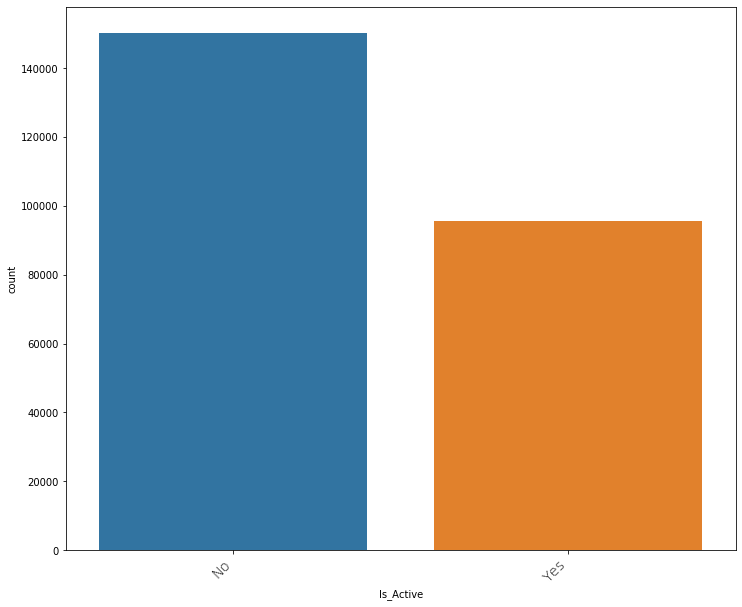

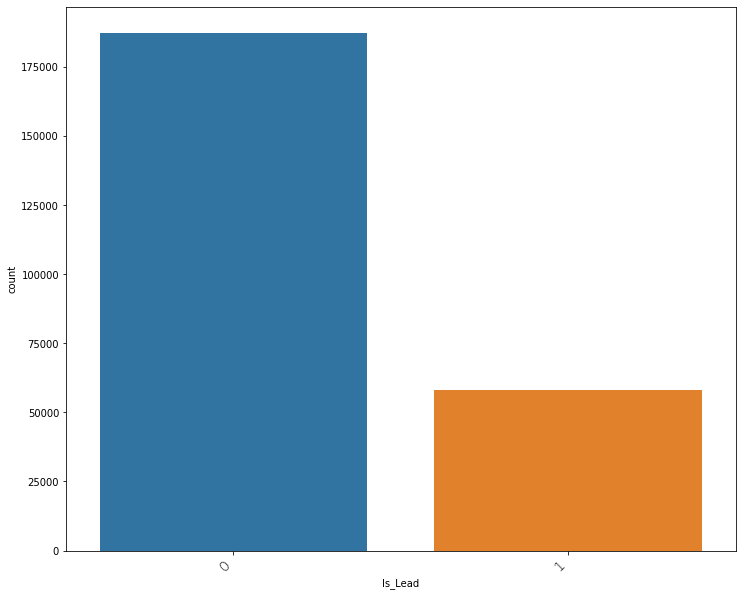

In [6]:
count_plot(data)

# Heatmap

In [7]:
from functools import partial


def corr_heatmap(dataframe, cmap=sns.diverging_palette(220, 10, as_cmap=True),
                 **kwargs):
    """
    :param dataframe: a pandas DataFrame
    :param cmap: color map to feed into sns.heatmap
    :param kwargs: kwargs to feed into sns.heatmap
    :return: fig, ax
    """
    corr = dataframe.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    # np.triu_indices_from returns the indices for the upper-triangle of mask
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    masked_heatmap = partial(sns.heatmap, mask=mask, cmap=cmap, vmax=0.3,
                             center=0, linewidths=0.5, square=True,
                             cbar_kws={"shrink": 0.5})
    ax = masked_heatmap(corr, **kwargs)
    return fig, ax

(<Figure size 792x648 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f89f2bf3a20>)

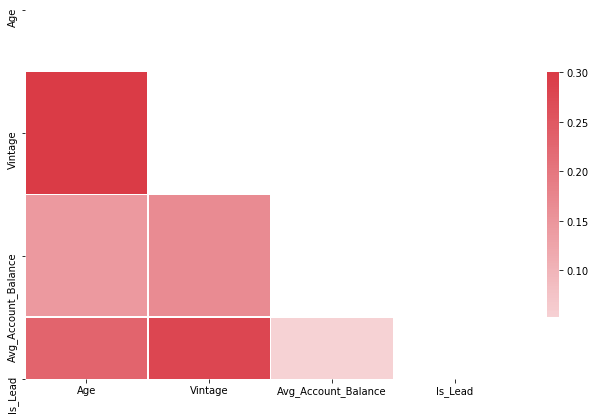

In [8]:
corr_heatmap(data)

In [67]:
#pfr = pandas_profiling.ProfileReport(data)
#pfr.to_file("/home/divyanka/xflow/lithium_profiling.html")